<a href="https://colab.research.google.com/github/irythmgarg/Simple-Linear-Regression-for-the-Absolute-Beginner/blob/main/Simple_Linear_Regression_for_Absolute_Beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

from IPython.display import Image, display
display(Image(filename='path_to_image/image.png'))


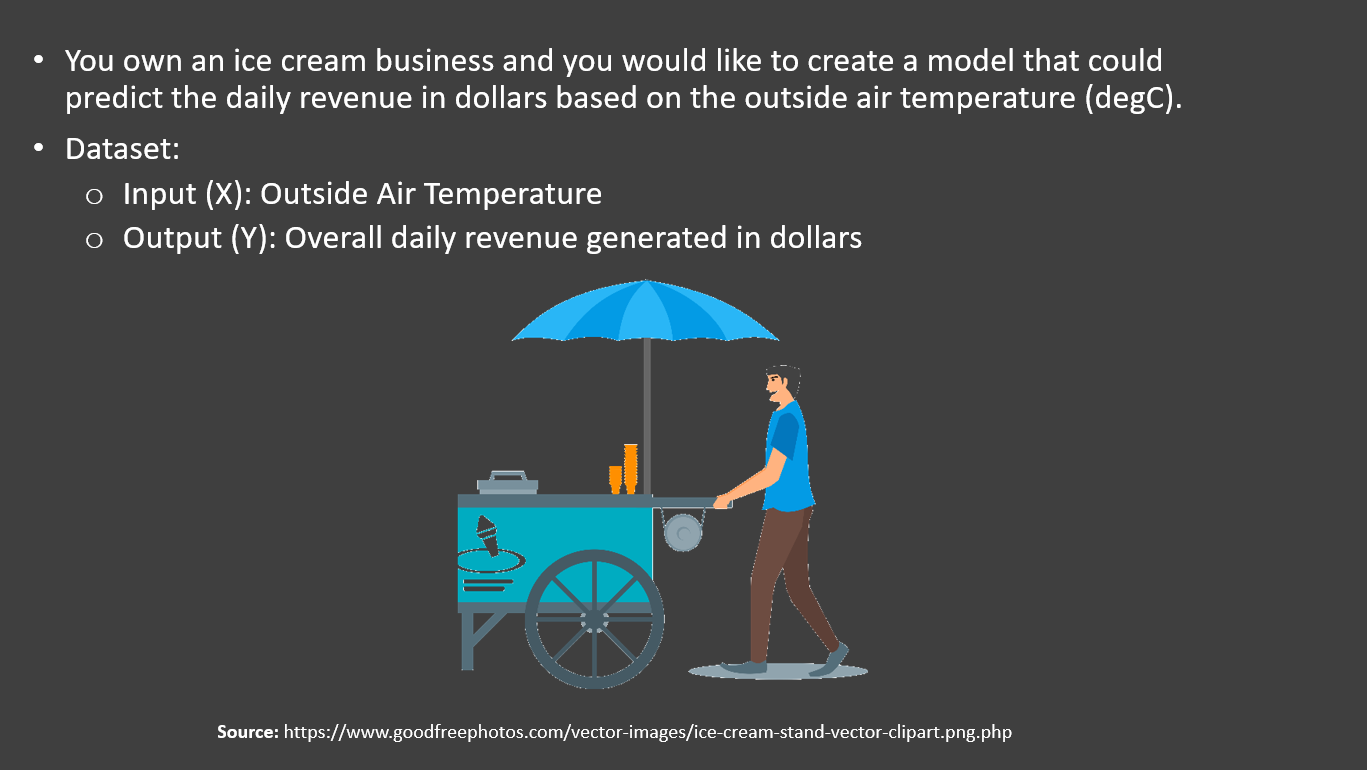

In [4]:
from IPython.display import Image, display

display(Image(filename='imge.png'))


# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.


In [ ]:
df=pd.read_csv('IceCreamData.csv')

In [ ]:
df.head() # how data looks.....

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [ ]:
df.isna().sum() # Hence no NULL values

Temperature    0
Revenue        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
df.sample(10) # randomly 10 rows of the dataset ...

,Temperature,Revenue
134,6.093897,158.849806
356,24.472432,596.876750
231,20.153345,449.112869
418,30.228104,679.712058
456,37.127070,892.947720
413,41.766589,969.291630
87,13.330606,344.688765
33,18.233228,418.137279
28,19.024611,517.534028
36,22.284550,550.278516



- **Calculate the average and maximum temperature and revenue using an alternative method**

In [ ]:
print('max temperature is',max(df.Temperature))
print('avg temperature is',np.mean(df.Temperature))

max temperature is 45.0
avg temperature is 22.232225113404002


In [ ]:
df.shape

(500, 2)

# TASK #3: PERFORM DATA VISUALIZATION

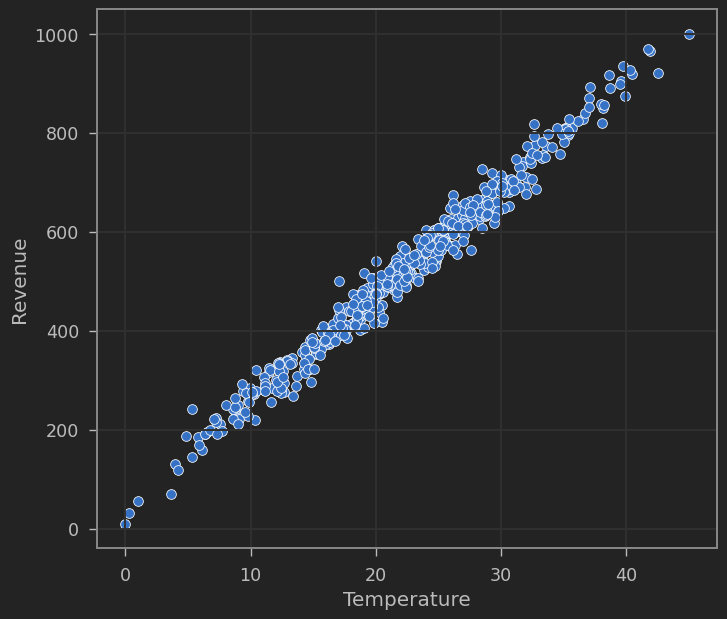

In [ ]:
sns.scatterplot(x=df['Temperature'],y=df['Revenue'])
plt.grid()

In [ ]:
df.corr() # very high correlation between Temperature and Revenue

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


<AxesSubplot: xlabel='Temperature', ylabel='Revenue'>

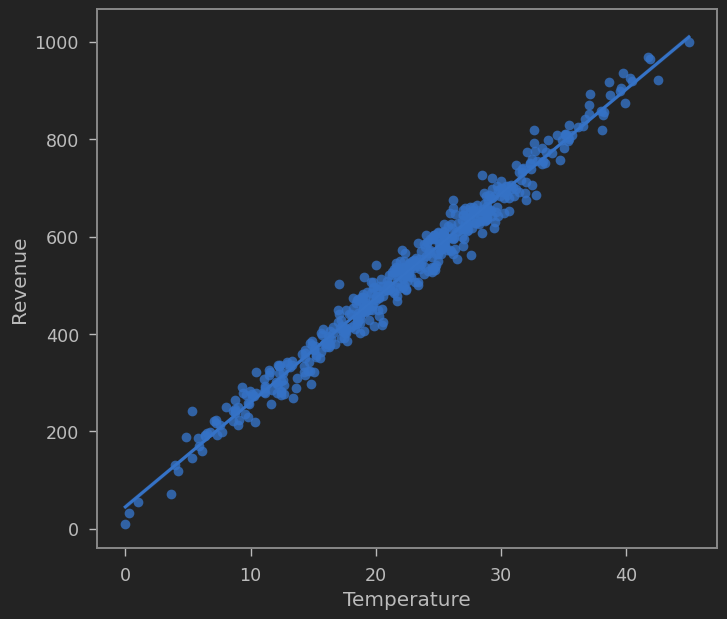

In [ ]:
sns.regplot(x='Temperature',y='Revenue',data=df) # fitting a best fit line to the data

# TASK #4: CREATE TESTING AND TRAINING DATASET

In [ ]:
from sklearn.model_selection import train_test_split
X=df['Temperature'];
y=df['Revenue'];

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape

(400,)

In [ ]:
X_test.shape

(100,)

In [ ]:
y_train.shape

(400,)

In [ ]:
y_test.shape

(100,)

# TASK #5: UNDERSTAND THEORY BEHIND SIMPLE LINER REGRESSION

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# TASK #6: TRAIN A SIMPLE LINEAR REGRESSION MODEL IN SCIKIT LEARN

In [ ]:
X_train = X_train.values.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(fit_intercept=True)
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('Linear Model Coeff(m)', lr.coef_)
print('Linear Model Coeff(b)',lr.intercept_)

Linear Model Coeff(m) [21.49856564]
Linear Model Coeff(b) 43.63450100549096


**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
- **Set the fit_intercept attribute to False and retrain the model. What do you notice? comment on the result.**

In [ ]:
from sklearn.linear_model import LinearRegression
lr2=LinearRegression(fit_intercept=False) # means force the line to pass through origin
lr2.fit(X_train,y_train)
print('Linear Model Coeff(m)', lr2.coef_)
print('Linear Model Coeff(b)',lr2.intercept_)

Linear Model Coeff(m) [23.22503918]
Linear Model Coeff(b) 0.0


# TASK #7: EVALUATE TRAINED SIMPLE LINEAR REGRESSION MODEL IN SCIKIT LEARN

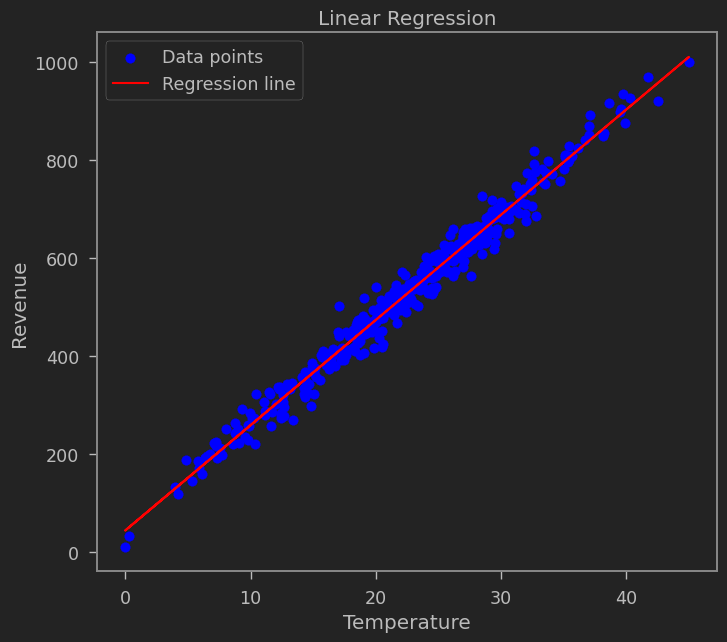

In [ ]:
lr.fit(X_train, y_train)

# Step 2: Make predictions using the model
y_pred = lr.predict(X_train)

# Step 3: Plot the scatter plot of the original data
plt.scatter(X_train, y_train, color='blue', label='Data points')

# Step 4: Plot the regression line
plt.plot(X_train, y_pred, color='red', label='Regression line')

# Add labels and title
plt.xlabel('Temperature')  # Replace with your feature name
plt.ylabel('Revenue')      # Replace with your target name
plt.title('Linear Regression')

# Show legend and plot
plt.legend()
plt.show()

In [ ]:
# for another model with Zero as an intercept

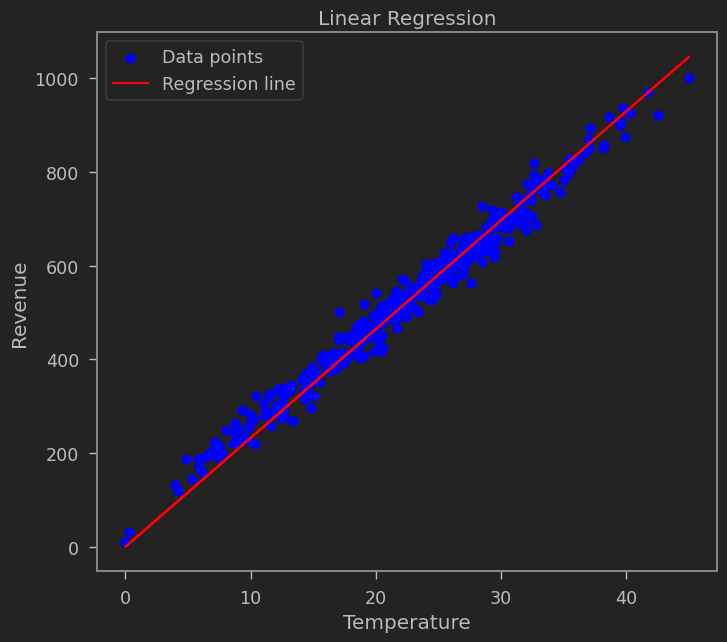

In [ ]:
lr2.fit(X_train, y_train)

# Step 2: Make predictions using the model
y_pred = lr2.predict(X_train)

# Step 3: Plot the scatter plot of the original data
plt.scatter(X_train, y_train, color='blue', label='Data points')

# Step 4: Plot the regression line
plt.plot(X_train, y_pred, color='red', label='Regression line')

# Add labels and title
plt.xlabel('Temperature')  # Replace with your feature name
plt.ylabel('Revenue')      # Replace with your target name
plt.title('Linear Regression')

# Show legend and plot
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# Reshape X_test to a 2D array
X_test_reshaped = X_test.values.reshape(-1, 1)

# Calculate the R^2 score
accuracy_LinearRegression = lr.score(X_test_reshaped, y_test)
print("R^2 Score:", accuracy_LinearRegression)

R^2 Score: 0.9785214490245013


In [ ]:
r2 = lr.score(X_test_reshaped, y_test)
print("R^2 Score:", r2)

# Calculate Adjusted R^2
n = X_test_reshaped.shape[0]  # Number of observations
k = X_test_reshaped.shape[1]  # Number of features (1 in this case)

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print("Adjusted R^2 Score:", adjusted_r2)

R^2 Score: 0.9785214490245013
Adjusted R^2 Score: 0.9783022801369963


In [ ]:
# Use the trained model to generate predictions

Temp = np.array([20])
Temp = Temp.reshape(-1,1)

Revenue = lr.predict(Temp)
print('Revenue Predictions =', Revenue)


Revenue Predictions = [473.60581384]


In [ ]:
# Use the trained model to generate predictions on 2nd model with zero as intercept

Temp = np.array([20])
Temp = Temp.reshape(-1,1)

Revenue = lr2.predict(Temp)
print('Revenue Predictions =', Revenue)

Revenue Predictions = [464.50078361]


In [ ]:
# o practice the concepts of simple linear regression,
# start by creating or obtaining a dataset with one
# independent variable (e.g., Temperature) and one
# dependent variable (e.g., Revenue). Begin by splitting
# the dataset into training and testing sets using tools
# like train_test_split from scikit-learn.
# Train a LinearRegression model on the training set,
# ensuring proper reshaping of features into a 2D array
# if necessary. Once trained, visualize the relationship
# by plotting a scatterplot of the data points and overlaying
# the regression line using predicted values.
# Evaluate the model using metrics such as
# 𝑅2 and Adjusted 𝑅2,understanding the relationship between the model's fit and the variance explained. Experiment by setting fit_intercept=False to observe the effect of excluding the intercept, and use these exercises to solidify the foundational understanding of simple linear regression.

# EXCELLENT JOB

# PRACTICE OPPORTUNITIES SOLUTION

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **Calculate the average and maximum temperature and revenue using an alternative method**

In [ ]:
sales_df.mean()

Temperature     22.232225
Revenue        521.570777
dtype: float64

In [ ]:
sales_df.max()

Temperature      45.0
Revenue        1000.0
dtype: float64

**PRACTICE OPPORUNITY #2 SOLUTION:**
- **Change the split ratio to allocate 30% for testing and 70% for training.**
- **Confirm that the train test split process is successful.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
X_train.shape

(350, 1)

In [ ]:
y_train.shape

(350, 1)

In [ ]:
X_test.shape

(150, 1)

In [ ]:
y_test.shape

(150, 1)

**PRACTICE OPPORTUNITY #3 SOLUTION:**
- **Set the fit_intercept attribute to False and retrain the model. What do you notice? comment on the result.**

In [ ]:
from sklearn.linear_model import LinearRegression

SimpleLinearRegression = LinearRegression(fit_intercept = False)
SimpleLinearRegression.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

**PRACTICE OPPORTUNITY #4 SOLUTION:**
- **Try at least 3 temperature values and record the output**
- **Perform a sanity check and comment on your results!**

In [ ]:
# Temp = 5, Revenue = $150
# Temp = 20, Revenue = $474
# Temp = 40, Revenue = $905